# Short Notebook on Regression

In [1]:
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

Let's first generate two random vectors linearly correlated.

In [2]:
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + 1.6*np.random.rand(1000, 1)

In [3]:
np.random.rand?

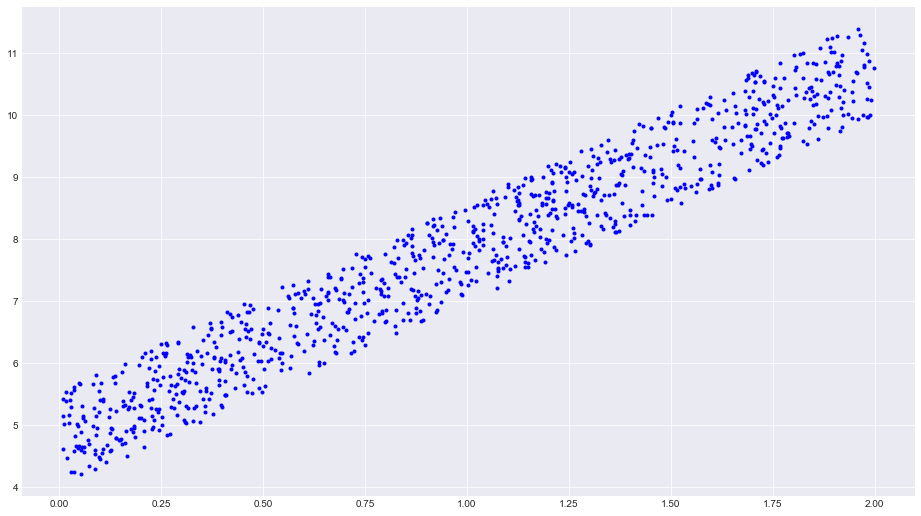

In [4]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X, y, "b.")

In [5]:
from sklearn import linear_model

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lin_reg?

In [20]:
lin_reg.coef_, lin_reg.intercept_

(array([[2.97108388]]), array([4.83517867]))

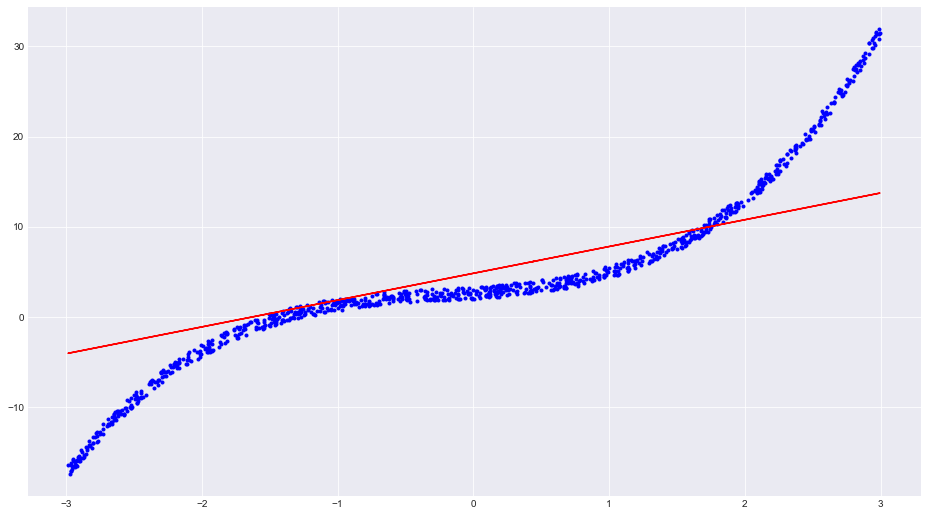

In [21]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X, y, "b.")
ax.plot(X, lin_reg.intercept_ + lin_reg.coef_*X, "r-")

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y_test, lin_reg.predict(X_test))

33.50120787375795

Getting to the case of a polynomial model.

In [24]:
m = 1000
X = 6 * np.random.rand(m, 1) - 3
y = 0.8*X**3 + 0.5 * X**2 + X + 2 + 1.4*np.random.rand(m, 1)

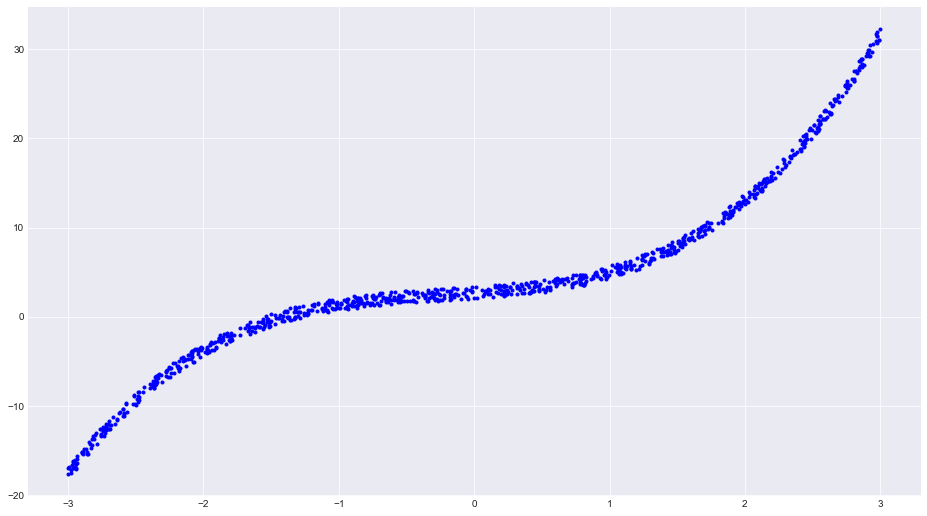

In [25]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X, y, "b.")

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
linear_reg = linear_model.LinearRegression()

In [30]:
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
linear_reg.coef_

array([[5.37278599]])

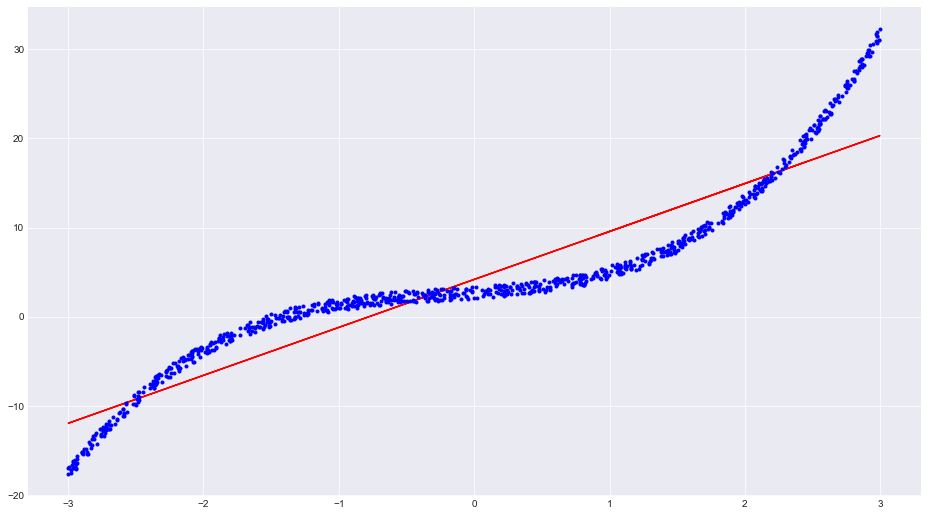

In [32]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X, linear_reg.coef_*X + linear_reg.intercept_, "r-")
ax.plot(X, y, "b.")

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error?

In [35]:
mean_squared_error(y_test, linear_reg.predict(X_test))

14.423095848344026

In [36]:
def plot_learning_curve(model, X, y, metric=mean_squared_error, min_size=10, max_size=None):
    """Plots learning curve of model against dataset X
    
    It assumes names mean_squared_error, train_test_split and plt are within the 
    environment name space. Respectively standing for sklearn.metrics.mean_squared_error
    sklearn.model_selection.train_test_split and matplotlib.pyplot.
    
    """
    # Splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Filling in vectors of errors against size of dataset
    train_errors, test_errors = [], []
    if not max_size:
        max_size = X_train.shape[0]
    for m in range(min_size, max_size):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(metric(y_train_predict, y_train[:m]))
        test_errors.append(metric(y_test_predict, y_test))
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(train_errors, "r+-", label="train")
    ax.plot(test_errors, "b-", label="test")
    ax.legend()

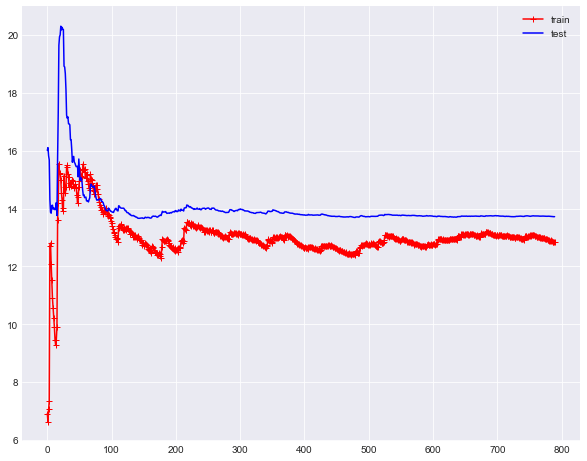

In [37]:
plot_learning_curve(linear_reg, X, y)

In [106]:
from sklearn.preprocessing import PolynomialFeatures

In [107]:
poly = PolynomialFeatures(3)

In [108]:
X_train_3 = poly.fit_transform(X_train)

In [109]:
cubic_reg = linear_model.LinearRegression()

In [112]:
cubic_reg.fit(X_train_3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
X_test_3 = poly.fit_transform(X_test)

In [115]:
mean_squared_error(y_test, cubic_reg.predict(X_test_3))

0.16453877928871244

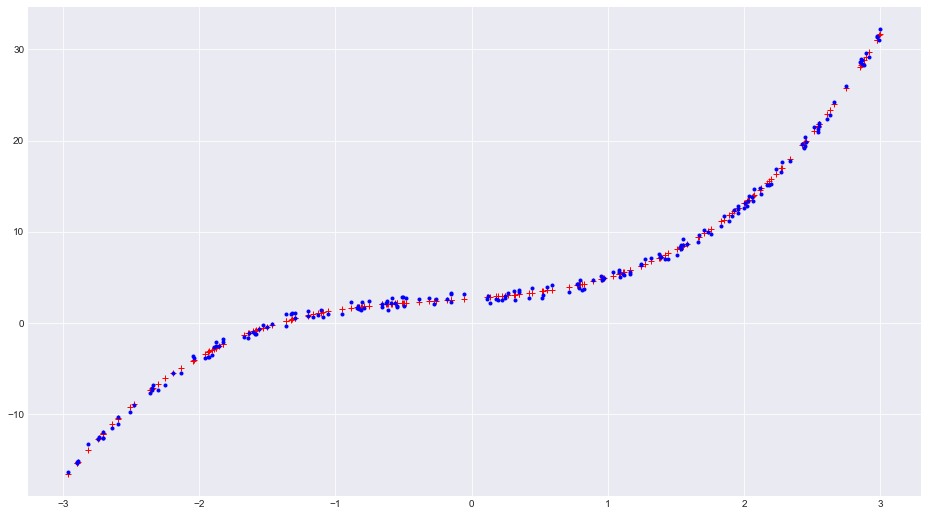

In [117]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X_test, cubic_reg.predict(X_test_3), "r+")
ax.plot(X_test, y_test, "b.")

In [118]:
X_3 = poly.fit_transform(X)

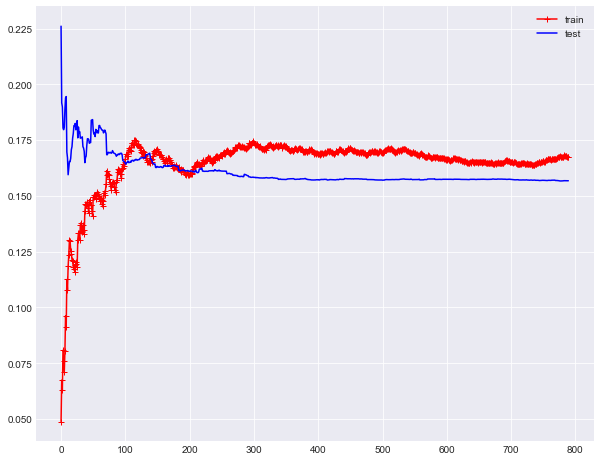

In [120]:
plot_learning_curve(squared_reg, X_3, y)